In [ ]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

import PIL
import  tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Activation, Flatten, Dropout, Dense,BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
!unzip /content/covid_data.zip -d /content/covid_data

Archive:  /content/covid_data.zip
   creating: /content/covid_data/covid_data/COVID/
  inflating: /content/covid_data/covid_data/COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png  
  inflating: /content/covid_data/covid_data/COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png  
  inflating: /content/covid_data/covid_data/COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png  
  inflating: /content/covid_data/covid_data/COVID/2020.01.24.919183-p27-132.png  
  inflating: /content/covid_data/covid_data/COVID/2020.01.24.919183-p27-133.png  
  inflating: /content/covid_data/covid_data/COVID/2020.01.24.919183-p27-134.png  
  inflating: /content/covid_data/covid_data/COVID/2020.01.24.919183-p27-135.png  
  inflating: /content/covid_data/covid_data/COVID/2020.02.10.20021584-p6-52%0.png  
  inflating: /content/covid_data/covid_data/COVID/2020.02.10.20021584-p6-52%1.png 

showing  some covid and non covid images from raw dataset

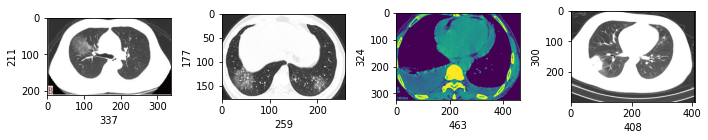

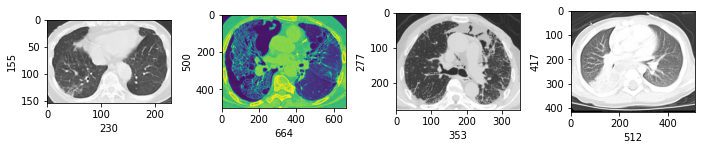

In [ ]:
#showing some raw images of covid and non covid from dataset
plt.figure(figsize=(10,10))
path = r"E:\covid_data\covid_data/COVID"
for i in range(1,5):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

plt.figure(figsize=(10,10))
path = r"E:\covid_data\covid_data\NonCOVID"
for i in range(1,5):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)    

making empty list to store labels and images

In [ ]:
#loading whole dataset of covid and non covid images
#making empty list for storing labels and all images
dir = "E:\covid_data\covid_data"
root_dir = listdir(dir)
image_list, label_list = [], []

In [ ]:
#appending labels in label_list and all images in image_list
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    images = img_to_array(image)
    image_list.append(images)
    label_list.append(directory)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#converting labels and images into array
image_list = np.array(image_list)
label_list = np.array(label_list)
image_list.shape , label_list.shape

((692,), (692,))

In [ ]:
#applying some preprocessing resizing and converting into gray scale on all images
data = []
for image in image_list:
    img = cv2.resize(image,(224,224))
    img = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )
    img = img/255
    data.append(img)

In [ ]:
#converting data into array
data = np.array(data)
data.shape

(692, 224, 224)

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
print(label_counts)
print(sum(label_counts))

NonCOVID    397
COVID       295
dtype: int64
692


In [ ]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

2

In [ ]:
# Visualize the number of classes count
label_count = pd.DataFrame(label_list,columns= ['label'])
label_counts =label_count.value_counts()
print(label_counts)
print(sum(label_counts))

label   
NonCOVID    397
COVID       295
dtype: int64
692


In [ ]:
import seaborn as sns

ploting seaborn graph

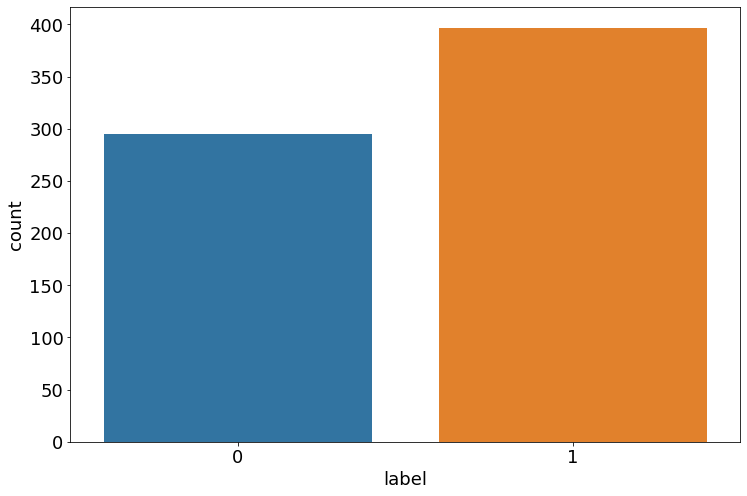

In [ ]:
#ploting seaborn graph
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = '18'
sns.countplot(x=label_count['label'], data = label_count)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#making function for defining classes(two classes)
def cov(i):
    if i == 'COVID':
        k = 0
        return k
    if i == 'NonCOVID':
        k = 1
        return k   

In [ ]:
label_count['label']= label_count['label'].apply(cov)

In [ ]:
#showing all labels
label_count

,label
0,1
1,1
2,1
3,1
4,1
...,...
687,0
688,0
689,0
690,0


# splitting data into train and test

In [ ]:
x_train , x_test , y_train,y_test = train_test_split(data,label_count['label'],test_size = .1)

In [ ]:
y_train= to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")

# building custom cnn model

In [ ]:
model = Sequential()

#module 1
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224,224,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#module 2
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#module 3
model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#flatten
model.add(Flatten())
#dense 1
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
#dense 2
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
#dense 3
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
#dense 3
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4095))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


#output layer
model.add(Dense(2, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 222, 222, 64)      0

In [ ]:
#expanding train and test dimension
x_train= np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test,axis = -1)

In [ ]:
x_train.shape , x_test.shape

((622, 224, 224, 1), (70, 224, 224, 1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#saving the model
filepath = 'my_best_model_covid_propose.epoch{epoch:02d}-loss{val_accuracy:.2f}.hdf5'

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

In [ ]:
# data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=True,
                        featurewise_std_normalization=True,
                        rotation_range=30,
                        width_shift_range=0.15,
                        height_shift_range=0.15,
                        zoom_range=.2,
                        horizontal_flip=True)

In [ ]:
#compiling the model
adam = tf.keras.optimizers.Adam(lr=0.000008, beta_1=.99, beta_2=.999, epsilon=1e-7)
model.compile(loss='binary_crossentropy', 
              optimizer= adam , 
              metrics=['accuracy'])

In [ ]:
#fitting the model
history = model.fit_generator(data_generator.flow(x_train, y_train, 16),
                                steps_per_epoch=len(x_train) / 16,
                                epochs=200,
                                verbose=1, 
                                callbacks=checkpoint,
                                validation_data=(x_test, y_test))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


39/38 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9855
Epoch 1: val_accuracy did not improve from 0.97143
38/38 [==============================] - 7s 112ms/step - loss: 0.0572 - accuracy: 0.9855 - val_loss: 0.3239 - val_accuracy: 0.8571
Epoch 2/200
39/38 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9871
Epoch 2: val_accuracy did not improve from 0.97143
38/38 [==============================] - 4s 104ms/step - loss: 0.0465 - accuracy: 0.9871 - val_loss: 0.2137 - val_accuracy: 0.9143
Epoch 3/200
39/38 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9743
Epoch 3: val_accuracy did not improve from 0.97143
38/38 [==============================] - 4s 104ms/step - loss: 0.0707 - accuracy: 0.9743 - val_loss: 0.1448 - val_accuracy: 0.9571
Epoch 4/200
39/38 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9839
Epoch 4: val_accuracy did not improve from 0.97143
38/38 [============================

# ploting accuracy and loss graph

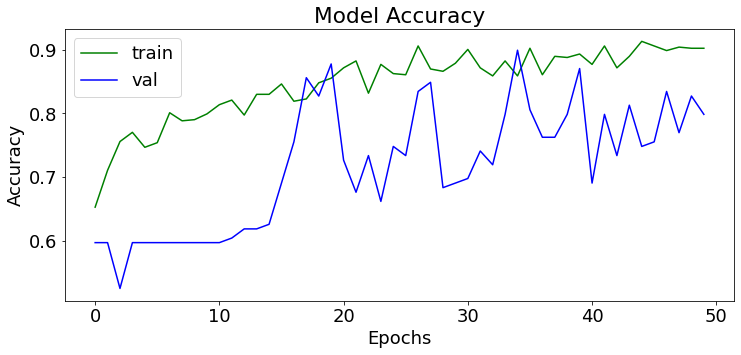

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='g')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

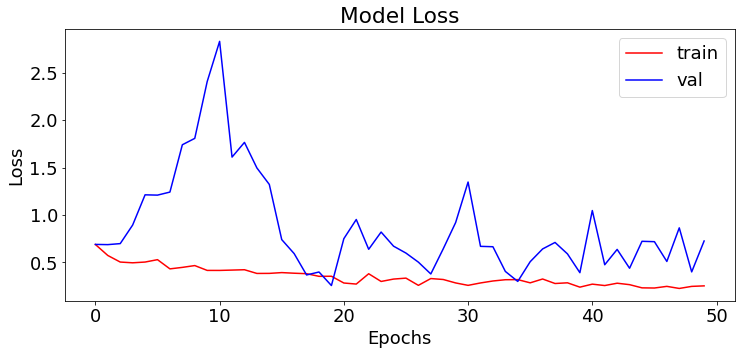

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model 

In [ ]:
#saving the best model
best_model =load_model('/content/my_best_model_covid_propose.epoch101-loss0.99.hdf5')

In [ ]:
#checking accuarcy
scores = best_model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

3/3 [==============================] - 0s 48ms/step - loss: 0.0643 - accuracy: 0.9857
Test Accuracy: 98.57142567634583


In [ ]:
# making Prediction
y_pred=best_model.predict(x_test)

y_true=np.argmax(y_test)

In [ ]:
labels = ['COVID','NonCOVID']

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_true = [np.argmax(i) for i in y_test]


In [ ]:
y_pred.shape

(70, 2)

# showing confusion matrix

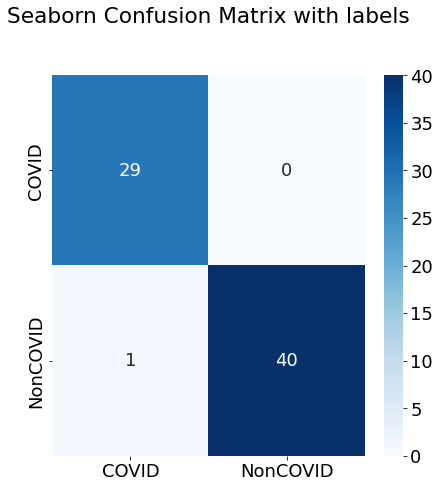

In [ ]:
import seaborn as sns
plt.figure(figsize= (7,7))
ax = sns.heatmap(cm1, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()